# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Reading the dataset 

In [2]:
stroke_data = pd.read_csv('StrokeDataset.csv')

In [3]:
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Preprocessing - Removing null values

In [5]:
null_values = stroke_data[stroke_data.isnull().any(axis=1)]
null_values['stroke'].value_counts()[0]

161

In [6]:
stroke_data2 = stroke_data.dropna()
stroke_data2.reset_index(drop=True, inplace=True)
stroke_data2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
stroke_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 460.3+ KB


# Preprocessing - Converting categorical data to numerical data

In [8]:
stroke_data3 = pd.DataFrame(stroke_data2)
# Replacing categorical data with numerical data.
# Replacing values in the gender column, i.e., Male and Female with 1 and 0 respectively.
stroke_data3['gender'] = stroke_data3['gender'].replace(['Male'],int(1))
stroke_data3['gender'] = stroke_data3['gender'].replace(['Female'],int(0))
stroke_data3['gender'] = stroke_data3['gender'].replace(['Other'],int(2))
# stroke_data3['gender'].astype(int)

# Replacing values of the ever_married column, i.e., Yes and No with 1 and 0 respectively.
stroke_data3['ever_married'] = stroke_data3['ever_married'].replace(['Yes'],int(1))
stroke_data3['ever_married'] = stroke_data3['ever_married'].replace(['No'],int(0))

# Replacing values of the work_type column, i.e., Private, Self-employed, Govt_job, Children and Never_worked
# with 0,1,2,3 and 4 respectively.
stroke_data3['work_type'] = stroke_data3['work_type'].replace(['Private'],int(0))
stroke_data3['work_type'] = stroke_data3['work_type'].replace(['Self-employed'],int(1))
stroke_data3['work_type'] = stroke_data3['work_type'].replace(['Govt_job'],int(2))
stroke_data3['work_type'] = stroke_data3['work_type'].replace(['children'],int(3))
stroke_data3['work_type'] = stroke_data3['work_type'].replace(['Never_worked'],int(4))

# Replacing values of the Residence_type column, i.e., Urban and Rural with 0 and 1 respectively
stroke_data3['Residence_type'] = stroke_data3['Residence_type'].replace(['Urban'],int(0))
stroke_data3['Residence_type'] = stroke_data3['Residence_type'].replace(['Rural'],int(1))

# Replacing values of the smoking_status column,i.e, 
stroke_data3['smoking_status'] = stroke_data3['smoking_status'].replace(['formerly smoked'],int(0))
stroke_data3['smoking_status'] = stroke_data3['smoking_status'].replace(['never smoked'],int(1))
stroke_data3['smoking_status'] = stroke_data3['smoking_status'].replace(['smokes'],int(2))
stroke_data3['smoking_status'] = stroke_data3['smoking_status'].replace(['Unknown'],int(3))


In [9]:
stroke_data3

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0,0,228.69,36.6,0,1
1,31112,1,80.0,0,1,1,0,1,105.92,32.5,1,1
2,60182,0,49.0,0,0,1,0,0,171.23,34.4,2,1
3,1665,0,79.0,1,0,1,1,1,174.12,24.0,1,1
4,56669,1,81.0,0,0,1,0,0,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4904,14180,0,13.0,0,0,0,3,1,103.08,18.6,3,0
4905,44873,0,81.0,0,0,1,1,0,125.20,40.0,1,0
4906,19723,0,35.0,0,0,1,1,1,82.99,30.6,1,0
4907,37544,1,51.0,0,0,1,0,1,166.29,25.6,0,0


# Visualizing the data

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'ever_married'}>],
       [<AxesSubplot:title={'center':'work_type'}>,
        <AxesSubplot:title={'center':'Residence_type'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'smoking_status'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

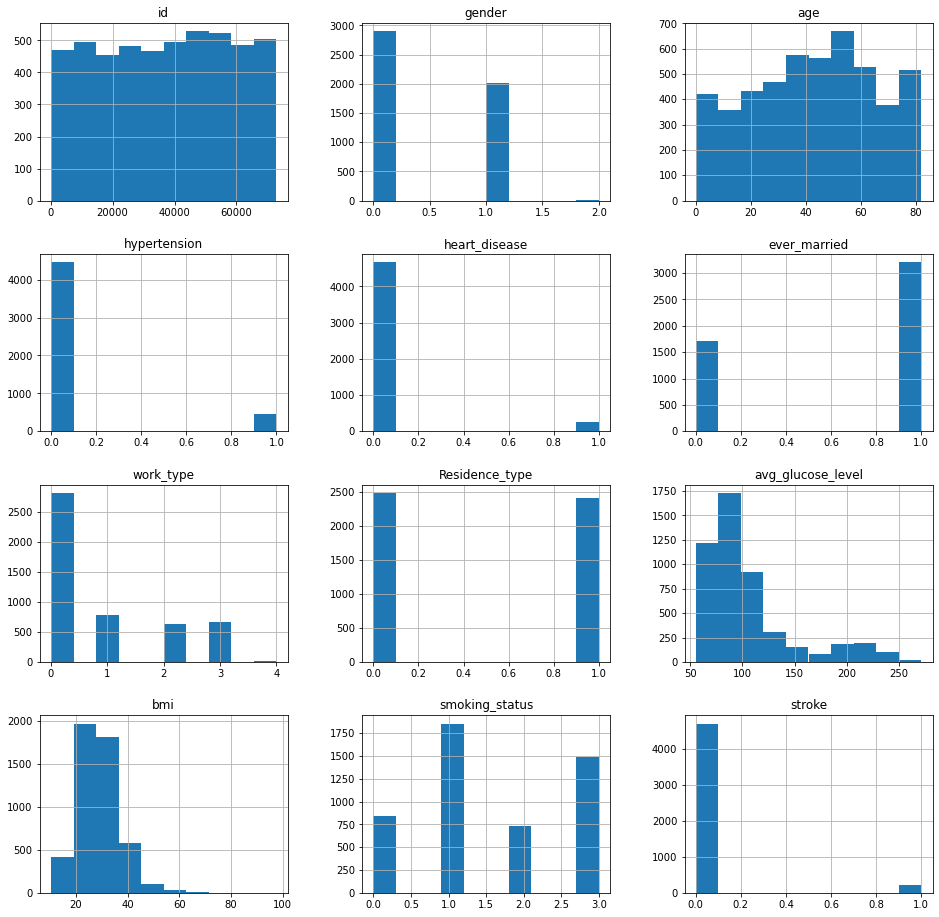

In [10]:
stroke_data3.hist(figsize=(16, 16))

# Performing log transformation on the data

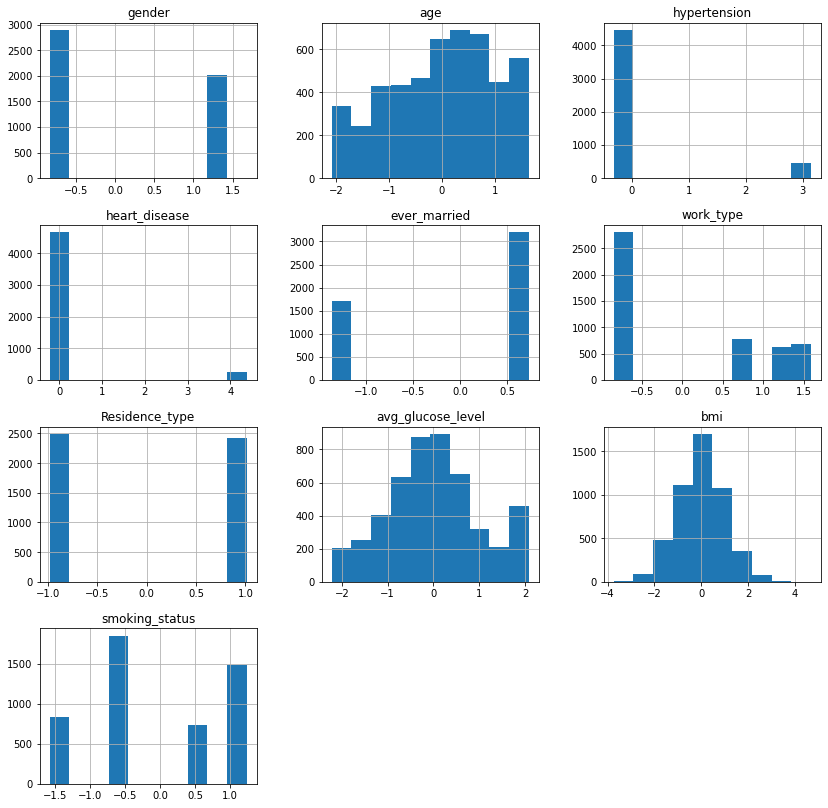

In [11]:
from sklearn.preprocessing import PowerTransformer

to_scale = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']

pt = PowerTransformer()
# Transform
stroke_data3[to_scale] = pd.DataFrame(pt.fit_transform(stroke_data3[to_scale]), columns=to_scale)

# Plot
stroke_data3[to_scale].hist(figsize=(14, 14));

# Splitting the dataset 

In [12]:
from sklearn.model_selection import train_test_split
stroke_data3 = stroke_data3.sample(frac=1).reset_index(drop=True)
x=stroke_data3.loc[:,stroke_data3.columns !='stroke']
y=stroke_data3.iloc[:,stroke_data3.columns =='stroke']

# Split into 30% testing data and 70% training data

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3436, 11), (3436, 1), (1473, 11), (1473, 1))

In [15]:
y_train.value_counts()

stroke
0         3290
1          146
dtype: int64

# SVM Classifier

In [16]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,balanced_accuracy_score,f1_score

In [17]:
weights = {0:1.0, 1:50.0}
model1=svm.LinearSVC(penalty='l2', class_weight=weights,random_state=42,C=100.0,dual=False)

In [18]:
model1.fit(x_train,y_train.values.ravel())
#model1.fit(X_train,y_train)

LinearSVC(C=100.0, class_weight={0: 1.0, 1: 50.0}, dual=False, random_state=42)

In [19]:
predict1=model1.predict(x_test)

In [20]:
accu=accuracy_score(y_test,predict1)
print(accu)

0.5756958587915818


In [21]:
cm= confusion_matrix(y_test, predict1)
cm

array([[791, 619],
       [  6,  57]])

In [22]:
print("Recall:")
v = cross_val_score(model1,x,y.values.ravel(),cv=5,scoring="recall")
print(v)
print("Balanced Accuracy:")
v2 = cross_val_score(model1,x,y.values.ravel(),cv=5,scoring="balanced_accuracy")
print(v2)
print("ROC_AUC:")
v3 = cross_val_score(model1,x,y.values.ravel(),cv=5,scoring="roc_auc")
print(v3)

Recall:
[0.97619048 0.9047619  0.92857143 0.92857143 0.92682927]
Balanced Accuracy:
[0.7545846  0.72844478 0.73556231 0.73077508 0.74054229]
ROC_AUC:
[0.8654002  0.81557751 0.83690476 0.81818642 0.8654904 ]


In [23]:
from sklearn.metrics import mean_squared_error,roc_curve, auc

In [24]:
mean_squared_error(y_test, predict1)

0.4243041412084182

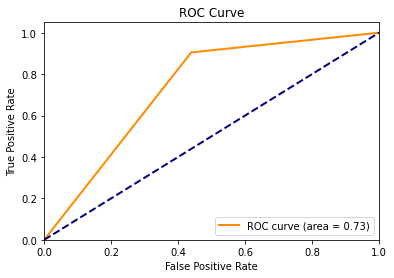

In [25]:
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
#Function to plot ROC Curve
def createROCCurve(y_test,y_pred,heading):    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_pred = label_binarize(y_pred,classes=[0,1])
    y_test = label_binarize(y_test,classes=[0,1])
    n_classes = y_test.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.figure()
    lw = 2
    plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(heading)
    plt.legend(loc="lower right")
    plt.show()
    
createROCCurve(y_test,predict1,'ROC Curve')